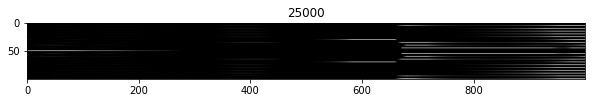

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C = 25000
df = pd.read_excel("Image crack1 diff freq.xlsx", index_col=0)
df = np.array(df)
df = df*C

image = Image.fromarray(df)
#image.save("sample1.jpg")

plt.figure(C, (10,100))  
plt.title(C)
plt.imshow(image, cmap = "gray")
plt.show()

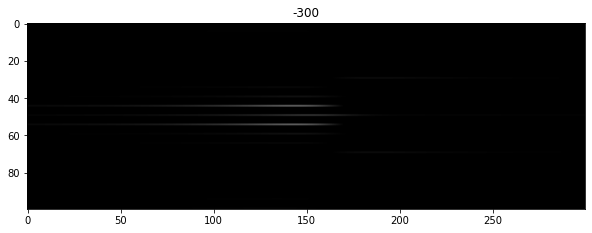

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C = -300
df = pd.read_excel("Image crack1 diff freq.xlsx", index_col=0)
df = np.array(df)
df = df*C
df = df[:,500:800]

image = Image.fromarray(df)

if image.mode != 'RGB':
    image = image.convert('RGB')

image.save("sample1.jpg")

plt.figure(C, (10,100))  
plt.title(C)
plt.imshow(image, cmap = "gray")
plt.show()

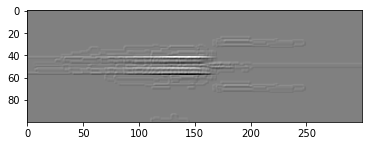

In [ ]:
import cv2

image = cv2.imread("sample1.jpg", cv2.IMREAD_GRAYSCALE)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = cv2.GaussianBlur(image, (5,5), 4, 4)
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
image = cv2.filter2D(image, -1, kernel = kernel)

ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image, ddepth, 1, 0, 3)
grad_y = cv2.Sobel(image, ddepth, 0, 1, 3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

plt.imshow(grad, cmap = "gray")


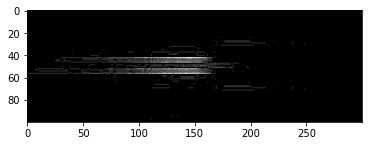

In [ ]:
alpha = 0.1
beta = 100

image2 = cv2.convertScaleAbs(image, alpha = alpha, beta = beta)
plt.imshow(image2, cmap = "gray")

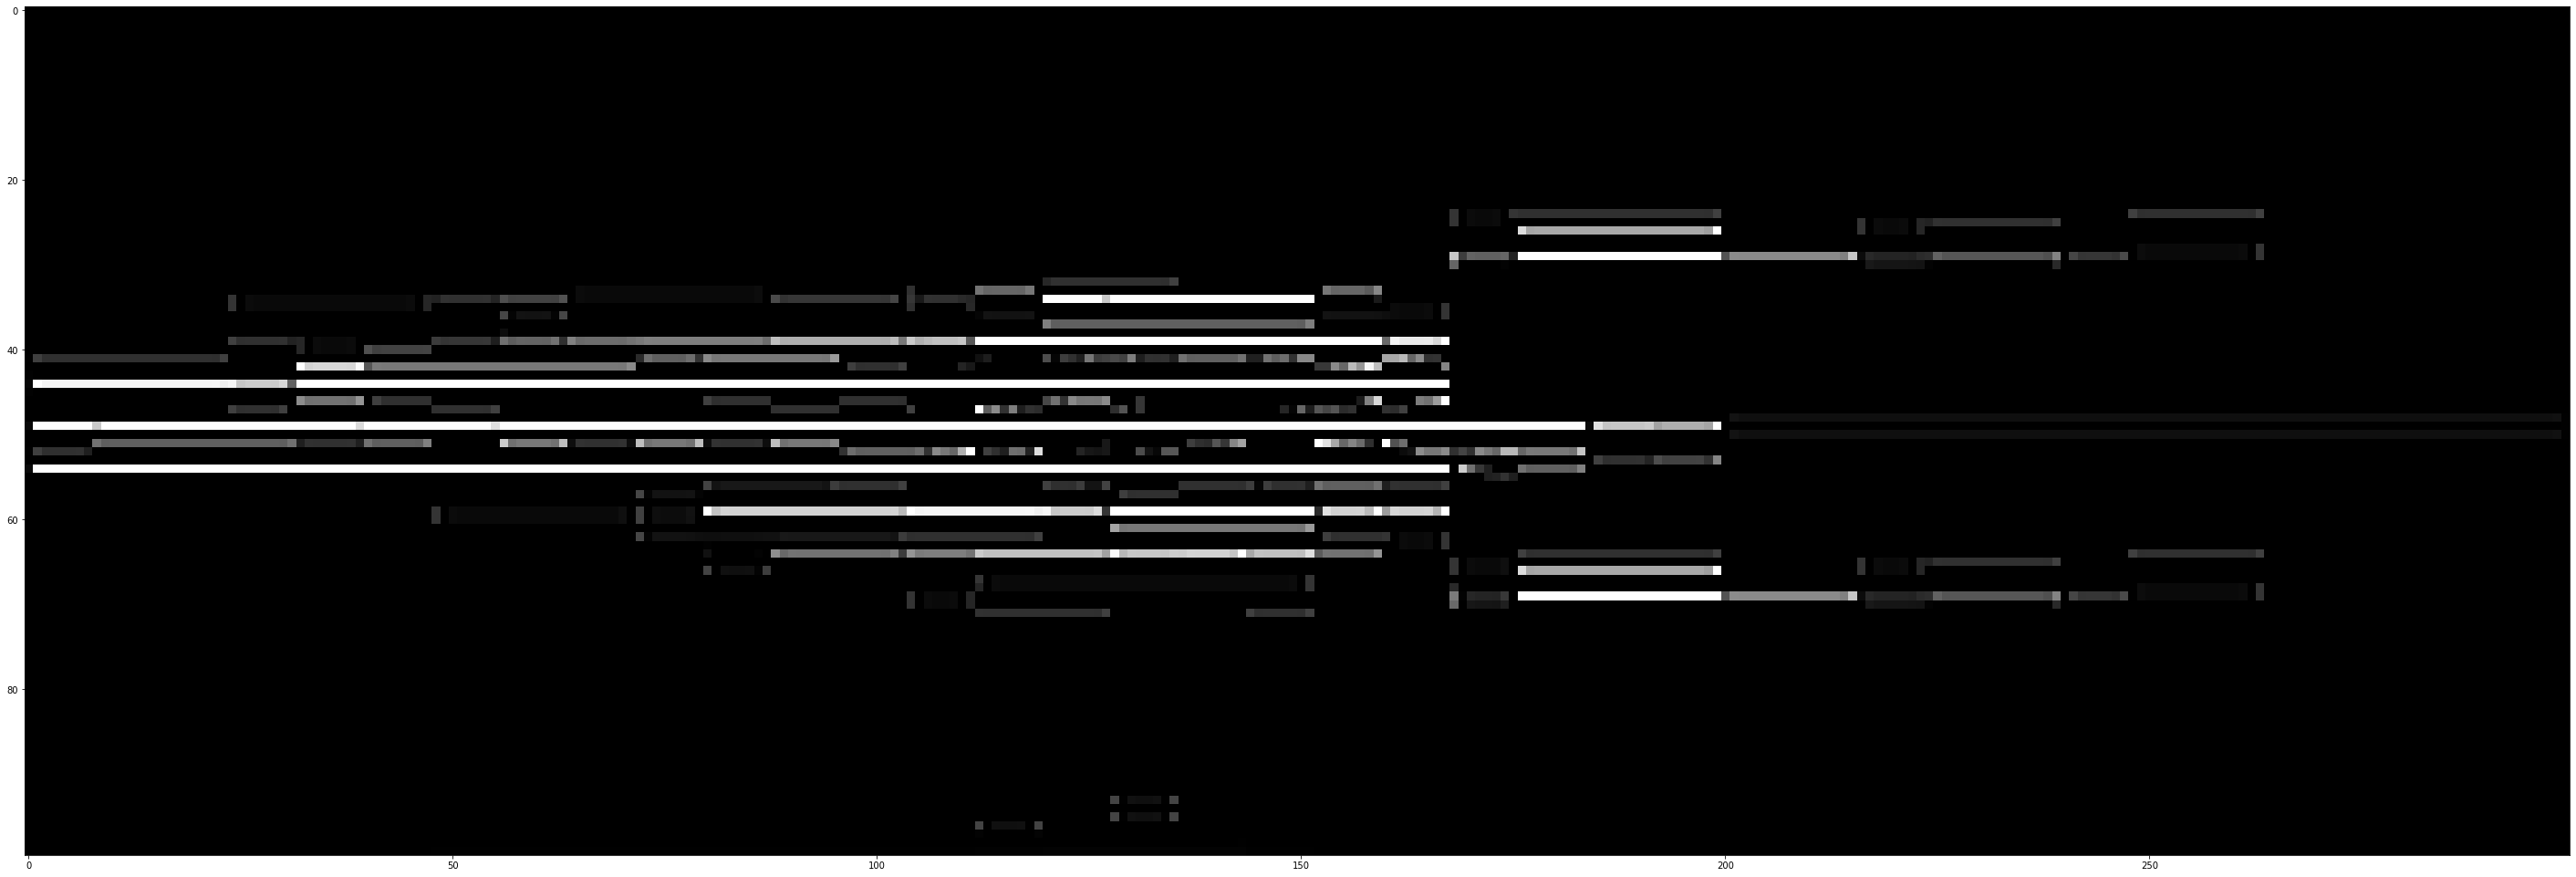

In [ ]:
PIL_image = Image.open('sample1.jpg')

image3 = cv2.resize(image2, None, fx = 5, fy = 10, interpolation = cv2.INTER_CUBIC) #different interpolation methods exist

from PIL import ImageFilter
image4 = PIL_image.filter(ImageFilter.SHARPEN)
image4 = image4.filter(ImageFilter.EDGE_ENHANCE)
image4 = image4.filter(ImageFilter.FIND_EDGES)

plt.figure(figsize = (50,100))
plt.imshow(image4, cmap = 'gray',interpolation = 'nearest')
plt.show()

interpolation; supported values are 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'

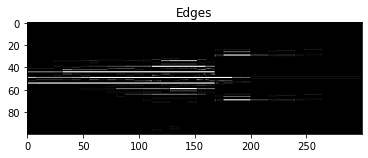

<Figure size 3600x7200 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter

image = Image.open("sample1.jpg")
image = ImageOps.grayscale(image)
rows, columns = image.size

image2 = np.zeros((rows,columns))

#Sharpening
#image2 = image.filter(ImageFilter.SHARPEN)

#Edge Enhancement
image2 = image.filter(ImageFilter.EDGE_ENHANCE)

#Edge Detection
image2 = image2.filter(ImageFilter.FIND_EDGES)

image2 = np.array(image2)

plt.title("Edges")
plt.imshow(image2, cmap = "gray")

plt.figure(figsize = (50,100))
plt.show()

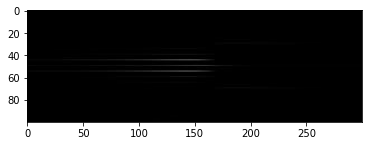

In [ ]:
image = cv2.imread("sample1.jpg")
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


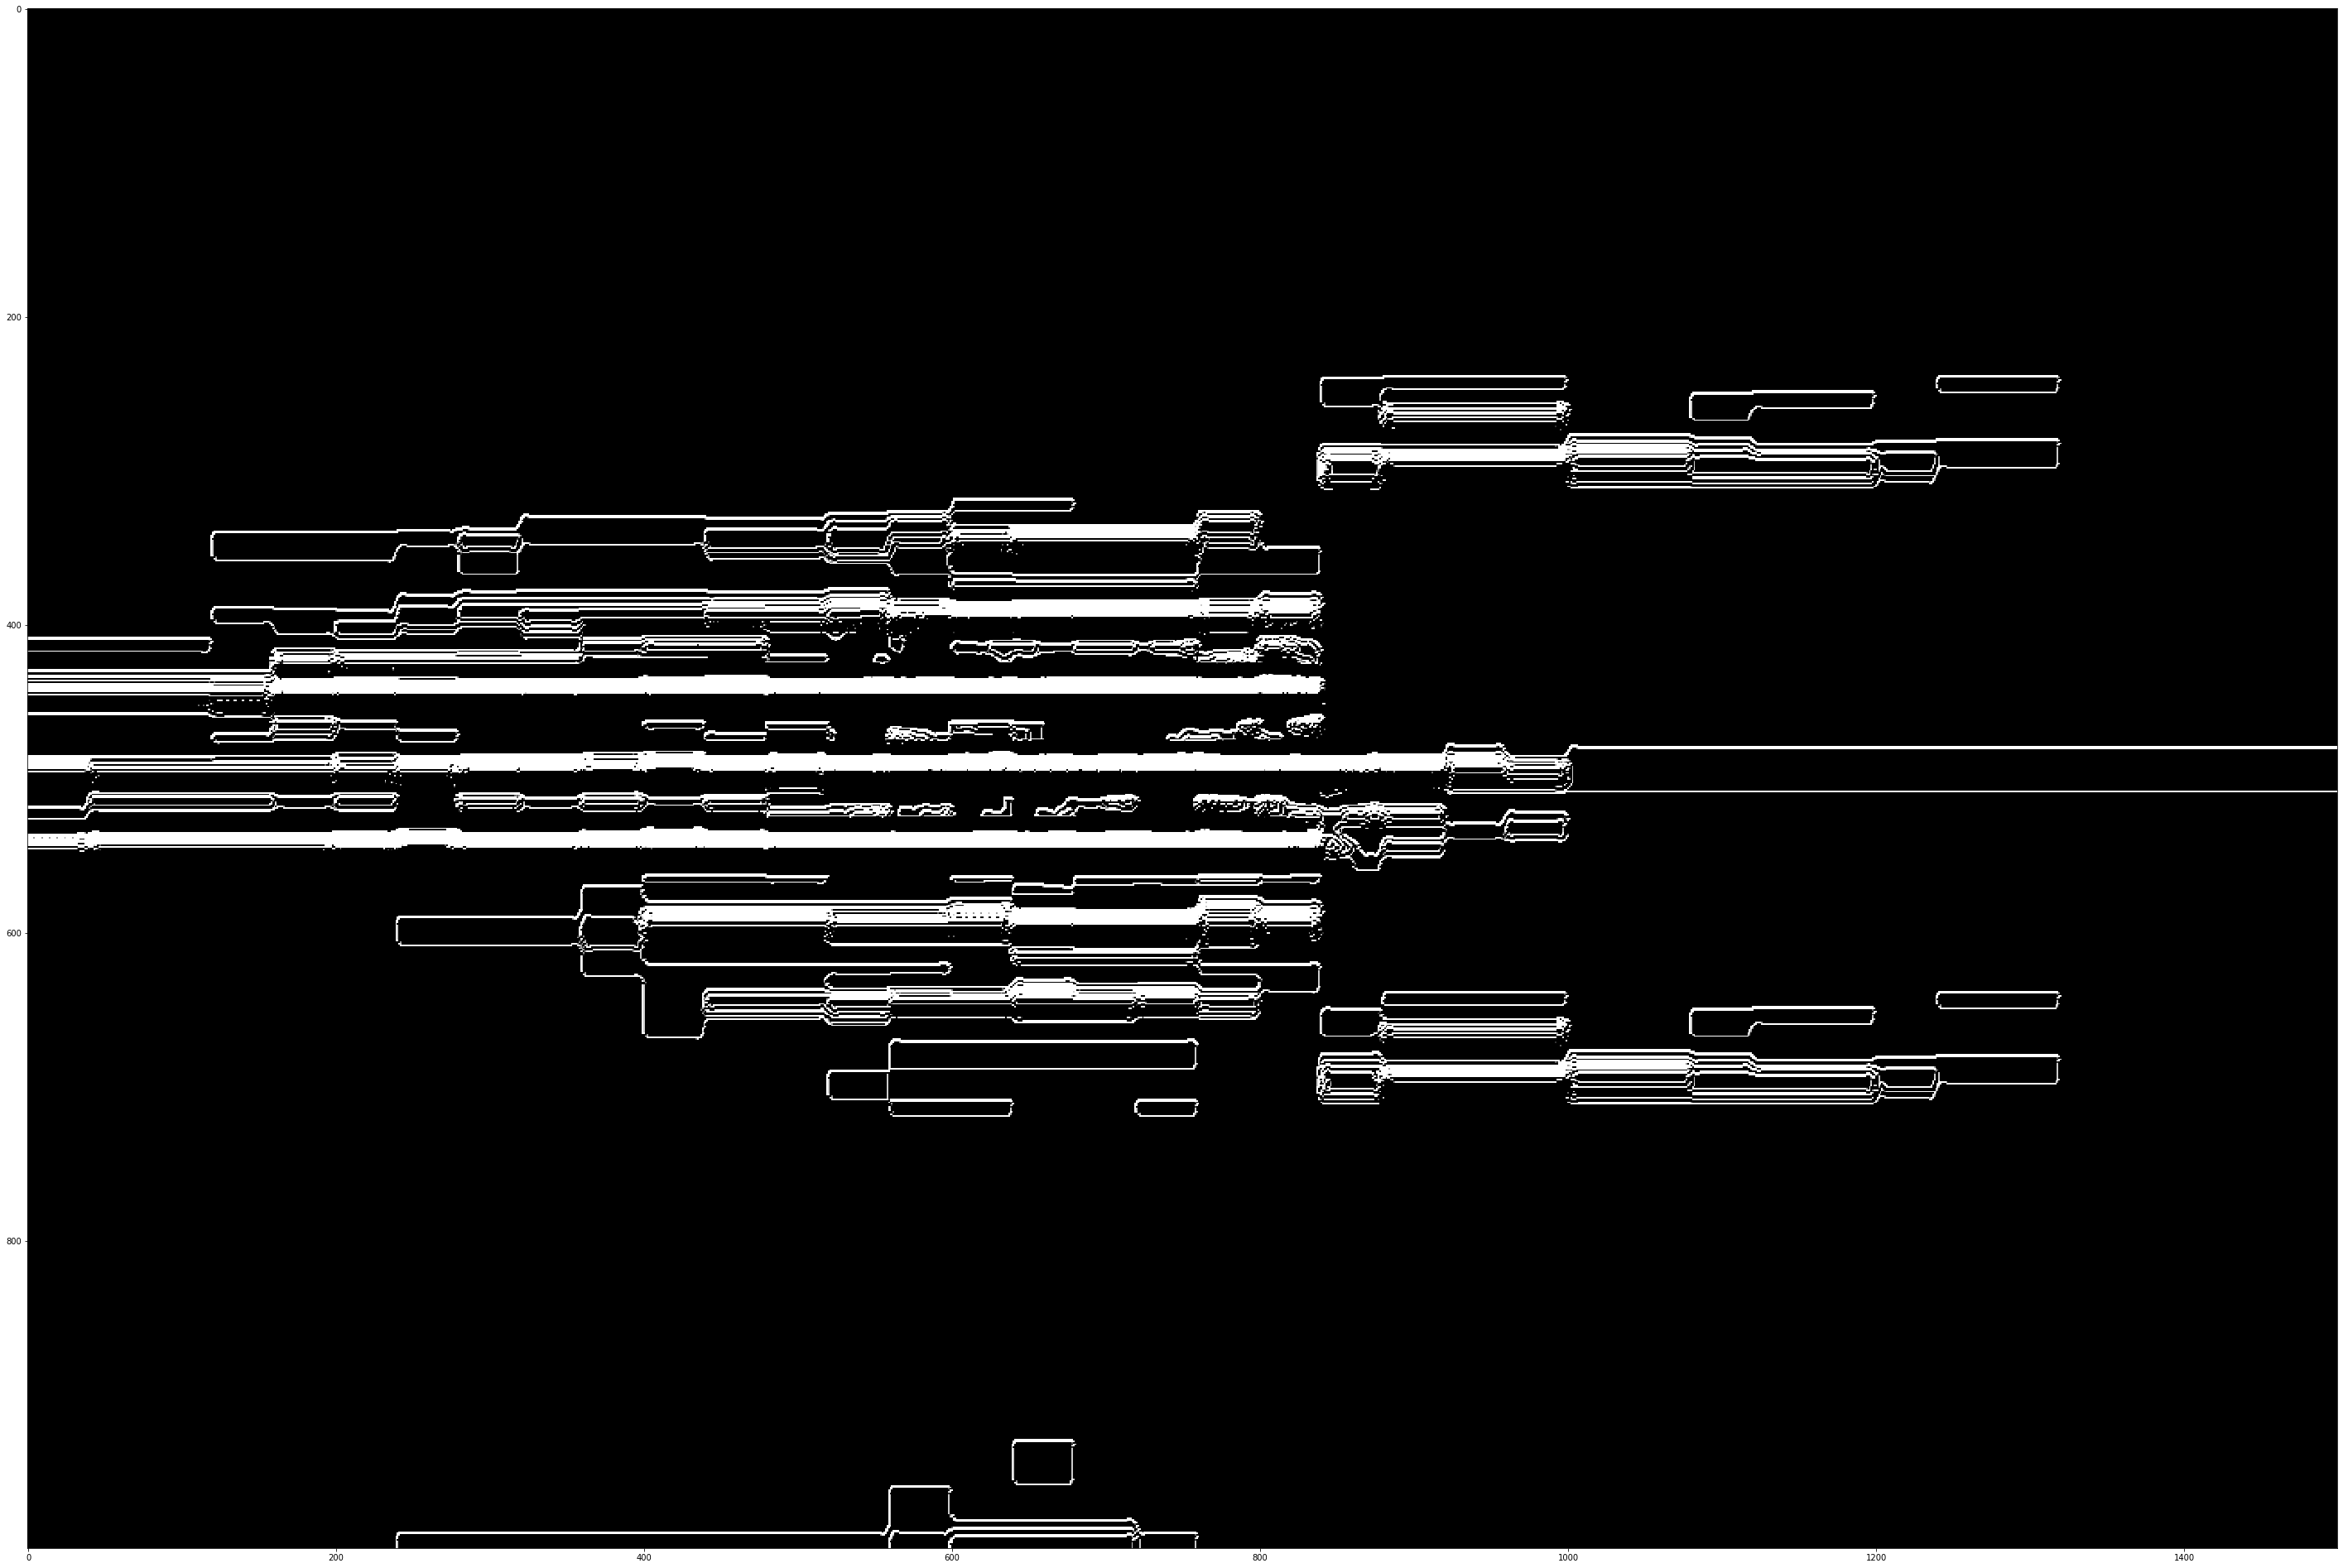

In [ ]:
image = cv2.resize(image, None, fx = 5, fy = 10, interpolation = cv2.INTER_CUBIC)

#image = cv2.GaussianBlur(image, (5,5), 4, 4)
kernel = np.array([[0, -1, 0], [-1,5, -1], [0, -1, 0]])
image = cv2.filter2D(image, -1, kernel = kernel)

ddepth = cv2.CV_64F
grad_x = cv2.Sobel(image, ddepth, 1, 0, 10)
grad_y = cv2.Sobel(image, ddepth, 0, 1, 10)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(grad_x, 0.2, grad_y, 0.8, 0)

plt.figure(figsize = (50,100))
plt.imshow(grad, cmap = 'gray', interpolation = 'nearest')

Feature Extraction

In [ ]:
#img = cv2.imread('sample1.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = np.float32(gray)

#dst = cv2.cornerHarris(gray, 8, 3 , 0.04)

# Applying dilation to increase the object area and to emphasize features
#dst = cv2.dilate(dst, None)

# Threshold for an optimal value. It may vary depending on the image.
#img[dst>0.05*dst.max()]=[255, 0, 255]

#plt.imshow(img)

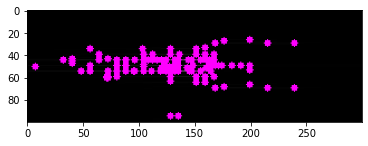

In [ ]:
img_1 = cv2.imread('sample1.jpg')
gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 1)
                              
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_1, (x,y), 3, (255, 0, 255), -1)

plt.imshow(img_1)

In [ ]:
#img_1 = cv2.imread('sample1.jpg')
#gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

#corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 1)
                              
#corners = np.int0(corners)

#X = []
#Y = []

#for i in corners:
 #   x, y = i.ravel()
 #   cv2.circle(img_1, (x,y), 3, (255, 0, 255), -1)
 #   X.append(x)
 #   Y.append(y)

#plt.imshow(img_1)

In [ ]:
#!pip install opencv-python==3.4.2.17
#!pip install opencv-contrib-python==3.4.2.17

In [ ]:
#img = cv2.imread('sample1.jpg')

#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#sift = cv2.xfeatures2d.SIFT_create()

#keypoints = sift.detect(img_gray, None)
#plt.imshow(cv2.drawKeypoints(img, keypoints, None, (255, 0, 255)))

In [ ]:
#img = cv2.imread('sample1.jpg')

#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#sift = cv2.xfeatures2d.SIFT_create()

#keypoints = sift.detect(img_gray, None)
#plt.imshow(cv2.drawKeypoints(img, keypoints, None, (255, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [ ]:
#img = cv2.imread('sample1.jpg')
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#surf = cv2.xfeatures2d.SURF_create()

#keypoints = surf.detect(img_gray, None)
#plt.imshow(cv2.drawKeypoints(img, keypoints, None, (255, 0, 255)))

In [ ]:
#orb = cv2.ORB_create(nfeatures=2500)
#keypoints_orb, descriptors = orb.detectAndCompute(img, None)
#plt.imshow(cv2.drawKeypoints(img, keypoints_orb, None, (255, 0, 255)))

For our application, best is goodfeaturetotrack algorithm

True

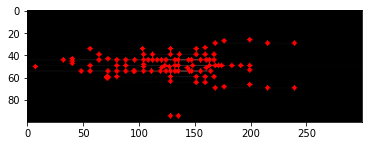

In [ ]:
img_1 = cv2.imread('sample1.jpg')
gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 1)
                              
corners = np.int0(corners)

X= []
Y= []


for i in corners:
    x, y = i.ravel()
    cv2.circle(img_1, (x,y), 2, (255, 0, 0), -1)
    X.append(x)
    Y.append(y)

plt.imshow(img_1)
cv2.imwrite("sample2.jpg", img_1)

In [ ]:
corners

array([[[167,  44]],

       [[164,  54]],

       [[160,  44]],

       [[163,  44]],

       [[155,  44]],

       [[155,  54]],

       [[183,  49]],

       [[168,  29]],

       [[111,  54]],

       [[167,  59]],

       [[168,  49]],

       [[ 88,  44]],

       [[167,  39]],

       [[168,  69]],

       [[128,  59]],

       [[ 96,  54]],

       [[ 95,  54]],

       [[135,  44]],

       [[151,  59]],

       [[112,  39]],

       [[120,  44]],

       [[135,  54]],

       [[104,  54]],

       [[159,  39]],

       [[ 96,  44]],

       [[163,  49]],

       [[128,  54]],

       [[ 88,  54]],

       [[ 72,  54]],

       [[112,  44]],

       [[ 80,  54]],

       [[160,  51]],

       [[ 32,  44]],

       [[159,  59]],

       [[104,  44]],

       [[ 56,  49]],

       [[119,  54]],

       [[ 72,  43]],

       [[159,  33]],

       [[ 88,  49]],

       [[171,  49]],

       [[199,  49]],

       [[143,  51]],

       [[151,  34]],

       [[151,  39]],

       [[ 

In [ ]:
X

[167,
 164,
 160,
 163,
 155,
 155,
 183,
 168,
 111,
 167,
 168,
 88,
 167,
 168,
 128,
 96,
 95,
 135,
 151,
 112,
 120,
 135,
 104,
 159,
 96,
 163,
 128,
 88,
 72,
 112,
 80,
 160,
 32,
 159,
 104,
 56,
 119,
 72,
 159,
 88,
 171,
 199,
 143,
 151,
 151,
 80,
 199,
 199,
 176,
 135,
 80,
 176,
 144,
 116,
 239,
 239,
 174,
 80,
 48,
 64,
 127,
 148,
 124,
 40,
 128,
 147,
 56,
 120,
 159,
 40,
 124,
 145,
 199,
 128,
 215,
 215,
 104,
 72,
 71,
 72,
 71,
 151,
 132,
 128,
 108,
 104,
 123,
 104,
 191,
 40,
 103,
 64,
 132,
 132,
 147,
 136,
 135,
 128,
 56,
 7]

In [ ]:
Y

[44,
 54,
 44,
 44,
 44,
 54,
 49,
 29,
 54,
 59,
 49,
 44,
 39,
 69,
 59,
 54,
 54,
 44,
 59,
 39,
 44,
 54,
 54,
 39,
 44,
 49,
 54,
 54,
 54,
 44,
 54,
 51,
 44,
 59,
 44,
 49,
 54,
 43,
 33,
 49,
 49,
 49,
 51,
 34,
 39,
 59,
 66,
 26,
 27,
 49,
 44,
 68,
 44,
 44,
 69,
 29,
 49,
 49,
 54,
 44,
 50,
 49,
 44,
 45,
 63,
 44,
 54,
 51,
 64,
 43,
 54,
 54,
 53,
 34,
 69,
 29,
 50,
 60,
 60,
 59,
 59,
 64,
 54,
 39,
 44,
 39,
 49,
 48,
 49,
 47,
 34,
 39,
 49,
 44,
 54,
 39,
 94,
 94,
 34,
 50]

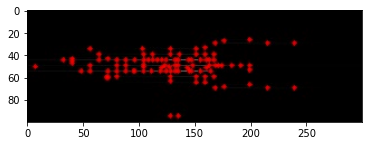

In [ ]:
img = cv2.imread("sample2.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)